# COVID-19 Projection

In [1]:
# library importing
import pandas as pd
import numpy as np
import nltk
import string
import seaborn as sns

In [2]:
us = pd.read_csv("../data/time_series_covid19_confirmed_US.csv")
gb = pd.read_csv("../data/time_series_covid19_confirmed_global.csv")

In [3]:
print(us.shape)
print(gb.shape)

(3340, 326)
(271, 319)


In [4]:
print(us.columns[:10])
us.head()

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_'],
      dtype='object')


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2617,2634,2661,2686,2704,2716,2735,2751,2780,2818
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,8199,8269,8376,8473,8576,8603,8733,8820,8890,9051
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1160,1161,1167,1170,1170,1171,1173,1175,1178,1189
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1136,1142,1157,1162,1170,1173,1179,1188,1196,1204
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2754,2763,2822,2855,2879,2888,2922,2946,2997,3061


In [5]:
print(gb.columns[:10])
gb.head()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20'],
      dtype='object')


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,44706,44988,45280,45490,45716,45839,45966,46215,46498,46717
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251


In [6]:
def create_time_series(df, index):
    ts = pd.DataFrame()

    date_index = 4
    if df.shape[1] == 326:
        date_index = 11

    dates = pd.Series(df.columns[date_index:])
    values = np.array(df.iloc[index, date_index:], dtype=int)
    ts["dates"] = dates
    ts["values"] = values
    return ts
us_ts = create_time_series(us, 4)
us_ts[-10:]

,dates,values
305,11/22/20,2754
306,11/23/20,2763
307,11/24/20,2822
308,11/25/20,2855
309,11/26/20,2879
310,11/27/20,2888
311,11/28/20,2922
312,11/29/20,2946
313,11/30/20,2997
314,12/1/20,3061


In [7]:
print(us["Country_Region"].unique())
print("\n", us["Province_State"].unique())
print("\nNumber of States =", us["Province_State"].unique().shape[0])

['US']

 ['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']

Number of States = 58


In [8]:
print(gb["Country/Region"].unique())

print("\nNumber of Countries =", gb["Country/Region"].unique().shape[0])

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jo

In [9]:
def get_index(df, name):
    col = "Country/Region"
    if df.shape[1] == 326:
        col = "Province_State"
    return df[df[col] == name].iloc[0].name

In [10]:
print("Mississippi Index =", get_index(us, "Mississippi"))
print("US Index =", get_index(gb, "US"))

Mississippi Index = 1456
US Index = 246


In [14]:
sweden_index = get_index(gb, "Sweden")
sweden = create_time_series(gb, sweden_index)
sweden.head()

,dates,values
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0


(315,)


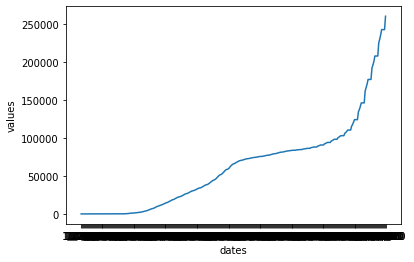

In [27]:
print(sweden["values"].shape)
sns.lineplot(data=sweden, x="dates", y="values")